# **KNN**

Este notebook tem como objetivo explorar o algoritmo **K-Nearest Neighbors (KNN)** utilizando o conjunto de dados `load_breast_cancer` disponível na biblioteca `scikit-learn`.

O foco será compreender o funcionamento do KNN, aplicar o modelo aos dados de diagnóstico de câncer de mama e avaliar seu desempenho com diferentes valores de **K** e métricas de avaliação.

**Sobre os dados**:
O dataset contém informações de características extraídas de imagens digitalizadas de massas de câncer de mama, com o objetivo de prever se o tumor é **maligno** ou **benigno**.


In [11]:
# Importandos as bibliotecas necessárias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA

# Configurando o pandas para exibir todas as colunas e linhas
pd.set_option('display.max_columns', None)  
pd.set_option('display.max_rows', None)
pd.set_option('display.width', 1000) 

In [3]:
# Carregando os dados
cancer = load_breast_cancer()

x = pd.DataFrame(cancer.data, columns=cancer.feature_names)
y = pd.Series(cancer.target)

In [4]:
x.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [5]:
y.value_counts()

1    357
0    212
Name: count, dtype: int64

In [6]:
# Normalizando os dados
scaler = MinMaxScaler(feature_range=(0, 1))
x_norm = scaler.fit_transform(x)

In [7]:
# Definindo os valores que serão testados no KNN 
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11, 13, 15],
    'p' : [1, 2, 3, 4],
    'metric': ['euclidean', 'manhattan', 'chebyshev']
}

In [8]:
# Criando o modelo KNN
knn = KNeighborsClassifier(n_neighbors=5)

# KNN com GridSearchCV
grid = GridSearchCV(knn, param_grid, cv=5)
grid.fit(x_norm, y)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan', 'chebyshev'],
                         'n_neighbors': [3, 5, 7, 9, 11, 13, 15],
                         'p': [1, 2, 3, 4]})

In [9]:
# Imprimindo os melhores parâmetros encontrados
print("Melhores parâmetros encontrados:")
print(f"Melhor acurácia: {grid.best_score_:.4f}")
print(f"Melhor K: {grid.best_params_['n_neighbors']}")
print(f"Melhor p: {grid.best_params_['p']}")
print(f"Melhor métrica: {grid.best_params_['metric']}")

Melhores parâmetros encontrados:
Melhor acurácia: 0.9701
Melhor K: 3
Melhor p: 1
Melhor métrica: manhattan


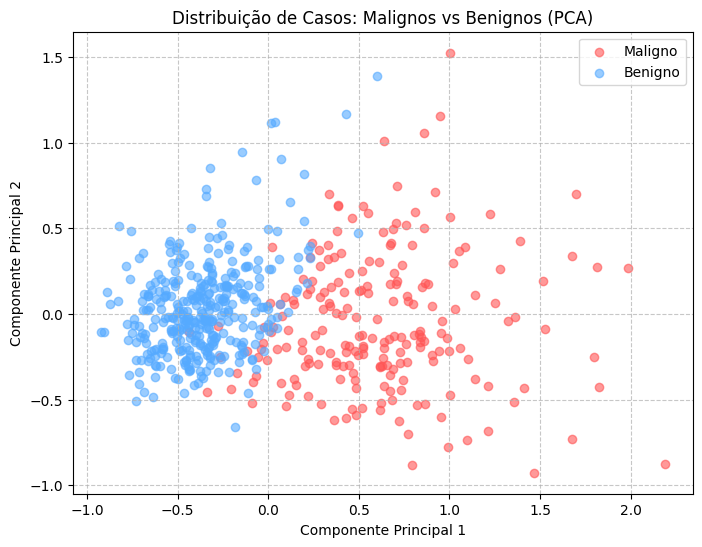

In [12]:
# Reduzindo a dimensionalidade para 2D com PCA
pca = PCA(n_components=2)
x_pca = pca.fit_transform(x_norm)

# Separando os pontos por classe (maligno e benigno)
maligno = x_pca[y == 0]  # y == 0 para maligno
benigno = x_pca[y == 1]  # y == 1 para benigno

# Criando o scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(maligno[:, 0], maligno[:, 1], color='#FF5555', label='Maligno', alpha=0.6)
plt.scatter(benigno[:, 0], benigno[:, 1], color='#55AAFF', label='Benigno', alpha=0.6)

# Configurando o gráfico
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title('Distribuição de Casos: Malignos vs Benignos (PCA)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()